#https://www.youtube.com/watch?v=wQ8BIBpya2k link to follow

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [2]:
import matplotlib.pyplot as plt
#%matplotlib notebook

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalise the dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)



In [4]:
x_train.shape

(60000, 28, 28)

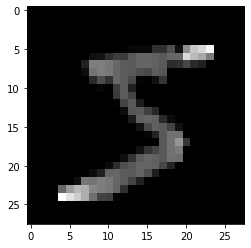

In [5]:
plt.imshow(x_train[0], cmap="gray")
#plt.show()

In [6]:
# Define model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [7]:
# model fitting
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4700 - accuracy: 0.8638
Epoch 2/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1162 - accuracy: 0.9645
Epoch 3/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0724 - accuracy: 0.9783
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0482 - accuracy: 0.9853


In [8]:
# test the model on test sets

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9743
0.08399368077516556 0.9743000268936157


In [9]:
# save the model and try to predict any number

model.save('number_recogniser')
new_model = tf.keras.models.load_model('number_recogniser')
predictions = new_model.predict([x_test])
print(predictions)
print(predictions.shape)

INFO:tensorflow:Assets written to: number_recogniser/assets
[[2.7070592e-09 7.4874904e-08 1.5033628e-05 ... 9.9998164e-01
  3.9739203e-09 9.3265163e-07]
 [4.3361700e-10 6.2504305e-06 9.9999368e-01 ... 5.2971560e-09
  1.4194405e-08 4.3095315e-13]
 [6.7317401e-08 9.9894994e-01 3.8250135e-05 ... 2.9835990e-04
  6.1489985e-04 9.2463861e-06]
 ...
 [2.7141139e-10 4.5707802e-06 3.4700476e-10 ... 1.5100524e-05
  7.8677442e-07 4.2341038e-04]
 [1.0019260e-07 2.3886368e-08 1.3970057e-07 ... 8.4645130e-08
  1.0676235e-03 4.8128257e-08]
 [1.7899556e-07 3.1467529e-09 1.8251288e-07 ... 1.7836189e-10
  1.6166654e-06 1.1635138e-09]]
(10000, 10)


In [10]:
import numpy as np
print(np.argmax(predictions[11]))


6


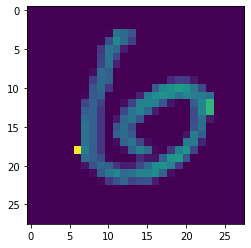

In [11]:
plt.imshow(x_test[11])
plt.show()